<a href="https://colab.research.google.com/github/Shivdutta/EIP4/blob/master/Week3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,DepthwiseConv2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


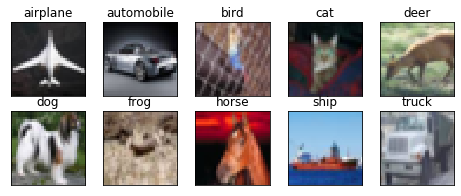

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # output(30,30,48) R.F(3,3),K.size(3,3,1)
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) # output(30,30,48) R.F(5,5),K.size(3,3,1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (15,15,48)
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))# output(15,15,96) R.F(7,7),K.size(3,3,1)
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))# output(13,13,96) R.F(9,9),K.size(3,3,1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # output(6,6,96) R.F(9,9),K.size(3,3,1)
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same')) # output(6,6,192) R.F(9,9),K.size(3,3,1)
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))  # output(4,4,192) R.F(11,11),K.size(3,3,1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (2,2,192)
model.add(Dropout(0.25))

model.add(Flatten()) #192*4=760 -- opened
model.add(Dense(512)) #512
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256)) #265
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # 10 class -rfer calss name
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipyke

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 15s 37ms/step - loss: 1.8659 - acc: 0.2798 - val_loss: 1.4541 - val_acc: 0.4528
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3559 - acc: 0.5066 - val_loss: 1.1766 - val_acc: 0.5682
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1163 - acc: 0.6043 - val_loss: 0.9598 - val_acc: 0.6554
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9724 - acc: 0.6598 - val_loss: 0.8603 - val_acc: 0.7045
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8609 - acc: 0.7043 - val_loss: 0.7604 - val_acc: 0.7456
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7904 - acc: 0.7313 - val_loss: 0.7005 - val_acc: 0.7606
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7415 - acc: 0.7453 - val_loss: 0.6943 - val_acc: 0.7622
Epoch 8/50
390/390 [==============================] - 7s 18m

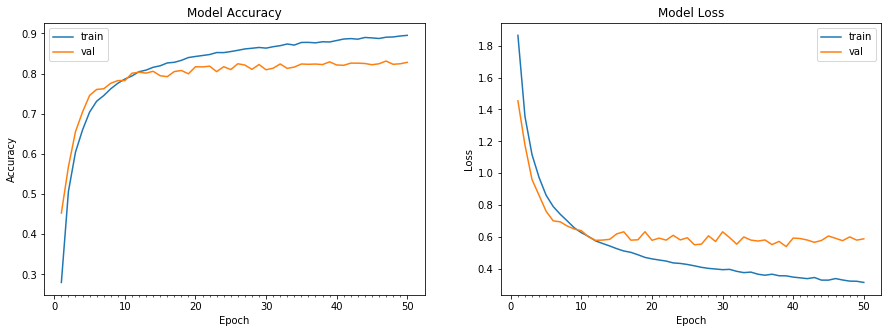

Accuracy on test data is: 82.80


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [16]:
#it uses depthwise separable convolution ONLY (no Conv2D)
#it uses BatchNormalization 
#has less than 100,000 parameters
#it uses proper dropout values
#you've mentioned the output size for each layer
#you've mentioned the receptive field for each layer
#runs for 50 epochs
#beats the validation score within 50 epochs (at any epoch run, doesn't need to be final one)
# Define the model

modelNew = Sequential()
modelNew.add(SeparableConv2D(48, kernel_size=(3, 3), depth_multiplier=1, dilation_rate=(2,2) , activation='relu', input_shape=(32,32,3) ))        # output(30,30,48) R.F(3,3),K.size(3,3,1)
modelNew.add(SeparableConv2D(72, kernel_size=(3, 3), depth_multiplier=1,dilation_rate=(2,2) ,activation='relu'))                                 # output(28,28,48) R.F(5,5),K.size(3,3,1)
modelNew.add(MaxPooling2D(pool_size=(2, 2)))                                                                                  # (14,14,48)
modelNew.add(Dropout(0.25))

modelNew.add(SeparableConv2D(96, kernel_size=(3, 3), depth_multiplier=1,dilation_rate=(2,2) , activation='relu'))                                # output(12,12,96) R.F(7,7),K.size(3,3,1)
modelNew.add(SeparableConv2D(192, kernel_size=(3, 3), depth_multiplier=1, dilation_rate=(3,3) , activation='relu'))                                # output(10,10,96) R.F(11,11),K.size(3,3,1)
modelNew.add(MaxPooling2D(pool_size=(2, 2)))  # (4,4,192)
modelNew.add(Dropout(0.25))

modelNew.add(Flatten())
modelNew.add(Dense(256)) #32
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.5))
modelNew.add(Dense(num_classes, activation='softmax')) # 10 class -rfer calss name
# Compile the model
modelNew.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelNew.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_13 (Separab (None, 28, 28, 48)        219       
_________________________________________________________________
separable_conv2d_14 (Separab (None, 24, 24, 72)        3960      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 72)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 72)        0         
_________________________________________________________________
separable_conv2d_15 (Separab (None, 8, 8, 96)          7656      
_________________________________________________________________
separable_conv2d_16 (Separab (None, 2, 2, 192)         19488     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 192)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 12s 32ms/step - loss: 2.0816 - acc: 0.2054 - val_loss: 1.8266 - val_acc: 0.3236
Epoch 2/50
390/390 [==============================] - 11s 29ms/step - loss: 1.7503 - acc: 0.3518 - val_loss: 1.5947 - val_acc: 0.4077
Epoch 3/50
390/390 [==============================] - 11s 29ms/step - loss: 1.6018 - acc: 0.4125 - val_loss: 1.4951 - val_acc: 0.4453
Epoch 4/50
390/390 [==============================] - 11s 29ms/step - loss: 1.5213 - acc: 0.4384 - val_loss: 1.4337 - val_acc: 0.4671
Epoch 5/50
390/390 [==============================] - 11s 29ms/step - loss: 1.4656 - acc: 0.4624 - val_loss: 1.4269 - val_acc: 0.4766
Epoch 6/50
390/390 [==============================] - 11s 29ms/step - loss: 1.4197 - acc: 0.4819 - val_loss: 1.3513 - val_acc: 0.5030
Epoch 7/50
390/390 [==============================] - 11s 29ms/step - loss: 1.3823 - acc: 0.4958 - val_loss: 1.3189 - val_acc: 0.5226
Epoch 8/50
390/390 [==============================] - 11s 29ms

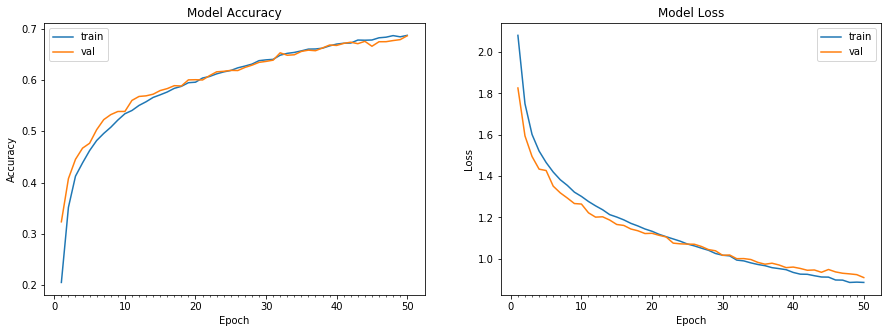

Accuracy on test data is: 68.60


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = modelNew.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, modelNew))